In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.reshape((-1,28,28,1)).astype('float32')/255
x_test = x_test.reshape((-1,28,28,1)).astype('float32')/255

In [10]:
model = keras.Sequential()

model.add(keras.layers.Input(shape=(28,28,1)))

model.add(keras.layers.Conv2D(64, (3,3), padding='valid'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))



model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(196, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(98, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)


In [11]:
hist= model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7546 - loss: 0.8132 - val_accuracy: 0.9664 - val_loss: 0.9402
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9442 - loss: 0.1854 - val_accuracy: 0.9760 - val_loss: 0.1261
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9555 - loss: 0.1442 - val_accuracy: 0.9796 - val_loss: 0.0654
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9663 - loss: 0.1104 - val_accuracy: 0.9829 - val_loss: 0.0511
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9707 - loss: 0.0959 - val_accuracy: 0.9827 - val_loss: 0.0549
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9733 - loss: 0.0869 - val_accuracy: 0.9841 - val_loss: 0.0481
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9755 - loss: 0.0781 - val_accuracy: 0.9833 - val_loss: 0.0530
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9790 - loss: 0.0680 - val_accuracy: 

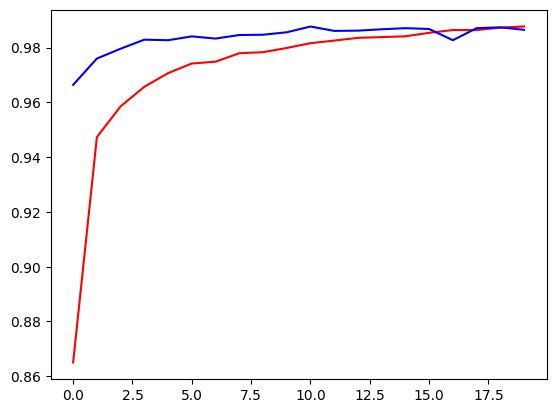

In [12]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], color='red')
plt.plot(hist.history['val_accuracy'], color='blue')

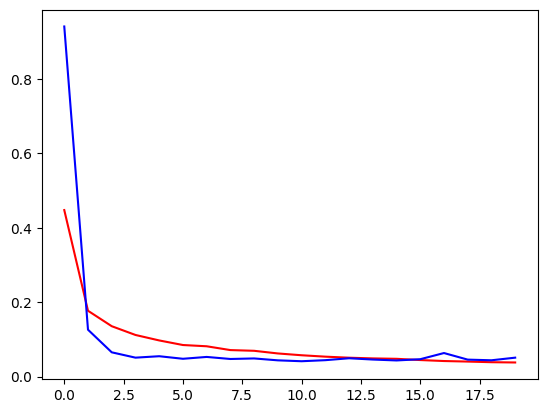

In [13]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], color='red')
plt.plot(hist.history['val_loss'], color='blue')